In [1]:
# 오늘 배울 군집은 거의 안 사용하는게 좋습니다. 정말 꼭 필요한 경우가 아니면 지도 학습에 분류방법(classification)을 보통 사용합니다.
# Clustering 비지도학습의 군집을 배워 봅시다.

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
from os.path import join

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
data = wine.data
label = wine.target
columns = wine.feature_names

data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# 데이터 수치가 차이가 나니까 민맥스 스케일링을 사용해서 수치를 맞춰줍니다.
# 지금이야 머리로 판단하고 손으로 전처리를 하지만 실제로는 Auto ML을 쓰면 전처리를 알아서 해줍니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

In [5]:
# 15개의 차원이 너무 많으므로 차원축소를 해봅시다.
# 별다른 이야기가 없으면 차원은 2차원으로 줄이는게 관례입니다.
# 데이터는 별로 없고 컬럼은 많은데 버릴 칼럼은 별로 없고 그럴 때 차원의 축소를 많이 합니다.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data[:5]

array([[-0.70633576, -0.25319275],
       [-0.4849768 , -0.00882289],
       [-0.52117227, -0.18918722],
       [-0.82164366, -0.58090551],
       [-0.20254638, -0.05946657]])

In [6]:
data.shape

(178, 2)

In [7]:
# 전처리가 끝났으니 이제 k-means 모델을 사용해봅시다. K 평균 모델은 군집분석의 모델 중 하나입니다.
# 케이민즈에서 중요한 것은 앤 클러스터입니다. 앤 클러스터는 정수형이고 디폴트값은 8입니다.
# 케이민즈는 바로 fit 하는 것이 특징입니다.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

KMeans(n_clusters=3)

In [8]:
# 케이민즈의 결과를 봅시다. 클러스터를 살펴봅니다. 클러스터는 전부 라벨 데이터 입니다.
# 그리고 예측치를 시각화 해봅시다.
cluster = kmeans.predict(data)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

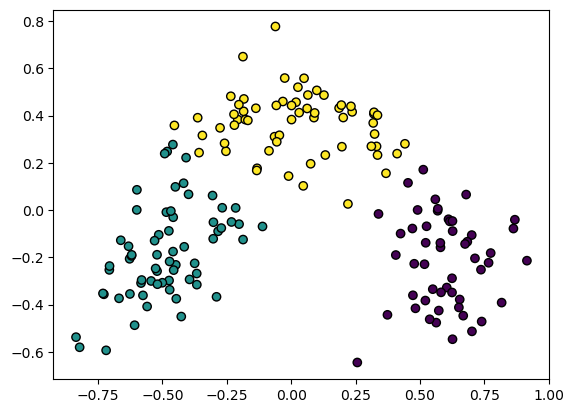

In [11]:
plt.scatter(data[:,0], data[:,1], c=cluster, linewidth=1, edgecolor='black') # x축(가로축)이 0번째 데이터 y축(세로축)이 1번째 데이터 입니다.

In [13]:
# 군집의 종류 중 또 다른 하나인 Hierarchical Clustering를 배워봅시다.
# 클러스터의 갯수를 지정할 필요가 없다는 것이 케이민즈와 큰 차이점입니다.
from scipy.cluster.hierarchy import single
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(linkage='single')

single_clustering.fit(data)
single_cluster = single_clustering.labels_  # 라벨을 가지고 오겠다는 뜻입니다.
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

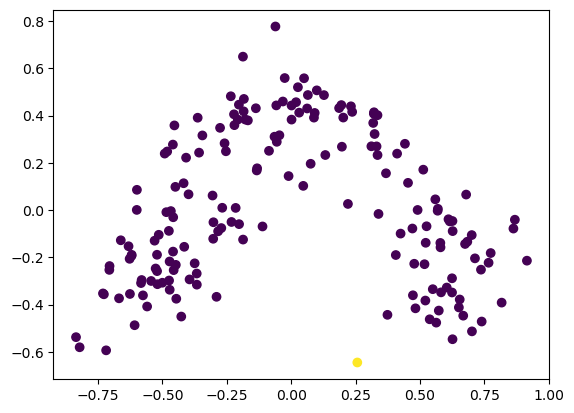

In [14]:
# 결과에 따른 산점도를 찍어봅시다.
plt.scatter(data[:,0],data[:,1], c=single_cluster)

In [16]:
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')  # 이번에는 클러스터를 3으로 강제로 쪼개봅시다.

single_clustering.fit(data)
single_cluster = single_clustering.labels_
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

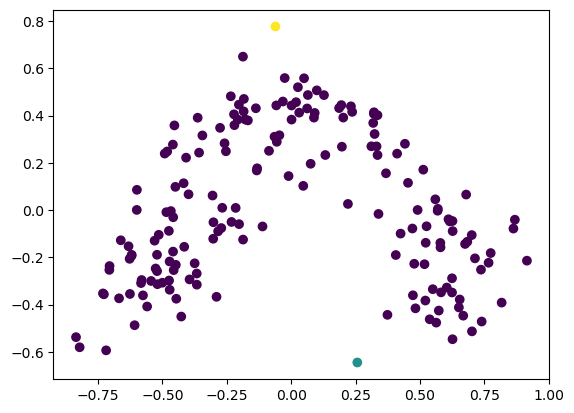

In [18]:
# 결과에 따른 산점도를 찍어봅시다.
plt.scatter(data[:,0],data[:,1], c=single_cluster)
# 쪼개긴 쪼갰는데 제대로 못 쪼갭니다.
# 이 방법은 군집을 찾는 것보단 동 떨어져있는 데이터를 찾는데 유리합니다.

In [19]:
# single이라는 옵션을 줬기 때문에 가까이 있는 것끼리 뭉치게 됩니다. 다른 옵션을 줘 봅시다.
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_clustering.fit(data)
complete_cluster = complete_clustering.labels_
complete_cluster
# 옵션만 바꿨는데 나름 군집이 잘 형성된 것을 볼 수 있습니다.

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

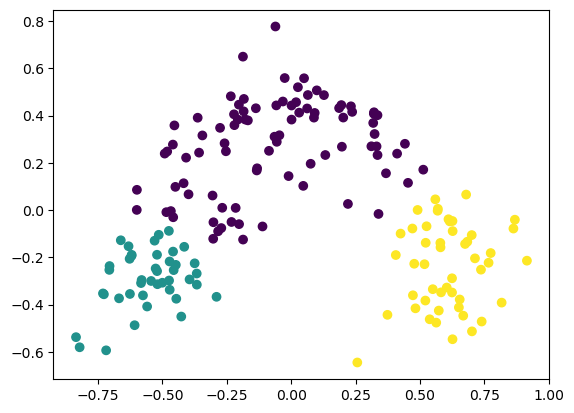

In [20]:
# 산점도를 찍어봅시다.
plt.scatter(data[:,0], data[:,1], c=complete_cluster)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [120.0, 120.0, 166.25, 166.25],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [195.0, 195.0, 220.0, 220.0],
  [143.125, 143.125, 207.5, 207.5],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [250.0, 250.0, 286.25, 286.25],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [322.5, 322.5, 352.5, 

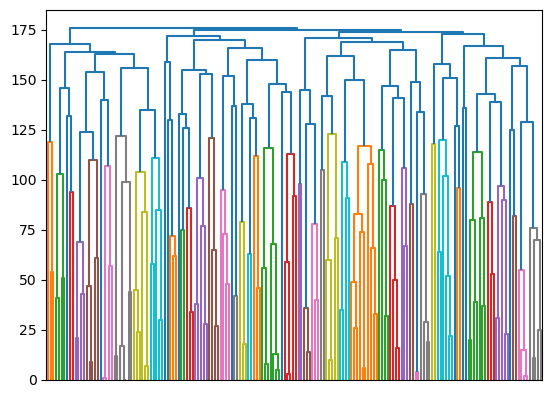

In [21]:
# 덴드로그램(dendrogram)은 Hierarchical Clustering을 사용할 때 도식화하는 그래프입니다.
from scipy.cluster.hierarchy import dendrogram

# 덴드로그램으로 Hierarchical Clustering의 자식노드에 대한 정보를 가지고 와봅시다.
children = complete_clustering.children_

# 그리고 거리를 구합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수를 계산해봅시다.
no_of_observations = np.arange(2, children.shape[0]+2)  # 왜 더하기 2를 할까요? 인덱스로 표현하면 1이 부족하고 또 루트노드에서 최상위노드를 구해야하면 또 더하기 1개를 해야해서 입니다.

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그려봅시다. 실무에서는 결과를 예상하거나 결과가 내 예상과 다르게 나올 때 그려봅니다.
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster, show_contracted=True, no_labels=True)
# x축은 와인의 데이터입니다.

In [24]:
# 각 그룹간 거리가 일정하게 떨어져 있어야 잘 된 군집이라고 할 수 있습니다. 이것을 측정하는 것이 실루엣입니다.
# 각 그룹간 밀집도가 높은게 잘 된 군집입니다.
# 가장 좋은 클러스터를 형성하는 클러스터의 수를 찾아봅시다.
# 가장 먼저 케이민즈로 해봅시다.
from sklearn.metrics import silhouette_score

best_n = -1  # 초기값을 -1로 하는 것은 관행입니다. 만에 하나 실루엣 값이 0이 나오면 초기값이 0이라서 0이 나온건지 뭔지 알 수 없기 때문에 변별력을 위해 마이너스 값을 줍니다.
best_score = -1 

for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)

# 실루엣 점수를 봅시다. 
  score = silhouette_score(data, cluster)

  print('Cluster count: {} Silhouette Score: {:.2f}'.format(n_cluster, score))

# 점수는 1에 가까울 수록 좋은 값 입니다.
  if score > best_score:
    best_n = n_cluster
    best_score = score

print('\n--------------------------------------------------------\n')
print('Best n_cluster: {} Silhoutette Score: {:.2f}'.format(best_n, best_score))
# 데이터가 라벨링이 되어있다면 클러스터는 쓰지 않는 편이 좋습니다.

Cluster count: 2 Silhouette Score: 0.49
Cluster count: 3 Silhouette Score: 0.57
Cluster count: 4 Silhouette Score: 0.49
Cluster count: 5 Silhouette Score: 0.46
Cluster count: 6 Silhouette Score: 0.43
Cluster count: 7 Silhouette Score: 0.40
Cluster count: 8 Silhouette Score: 0.39
Cluster count: 9 Silhouette Score: 0.39
Cluster count: 10 Silhouette Score: 0.39

--------------------------------------------------------

Best n_cluster: 3 Silhoutette Score: 0.57
